# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  3330k      0 --:--:--  0:04:30 --:--:-- 3854kk      0 --:--:--  0:00:08 --:--:-- 3522k   0 --:--:--  0:00:23 --:--:-- 4753k    0  4535k      0 --:--:--  0:00:43 --:--:-- 3125k   0 --:--:--  0:01:50 --:--:-- 2709k0k      0 --:--:--  0:01:52 --:--:-- 3194k0  3414k      0 --:--:--  0:02:09 --:--:-- 2467k0 --:--:-- 2358k 0:02:32 --:--:-- 2324k-- 2253k72k:--:--  0:04:03 --:--:-- 4788k0 --:--:--  0:04:21 --:--:-- 3973k


In [3]:
#!gunzip SUSY.csv.gz

In [1]:
ls -lh

total 5160824
-rw-r--r--@ 1 darleneeligado  staff    16K Mar 26 02:14 Blackjack_UML.pdf
-rw-r--r--  1 darleneeligado  staff    26K Feb 12 03:02 LAB2_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff    21K Mar 29 23:45 Lab.7.ipynb
-rw-r--r--  1 darleneeligado  staff    97K Feb 23 01:30 Lab3_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff    69K Mar  1 23:20 Lab4_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff    23K Mar  8 11:35 Lab5_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff    38K Mar 26 02:16 Lab_6_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff   4.7K Feb 16 12:35 Quick_Quiz_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff   7.4K Mar  8 10:08 Quiz2_DarleneEligado.ipynb
-rw-r--r--  1 darleneeligado  staff   228M Mar 29 22:52 SUSY-small.csv
-rw-r--r--  1 darleneeligado  staff   2.2G Mar 22 11:34 SUSY.csv
-rw-r--r--  1 darleneeligado  staff    14B Mar  1 23:12 Test.foo
-rw-r--r--  1 darleneeligado  staff   125B Mar  1 23:19 drawi

The data is provided as a comma separated file.

In [3]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [4]:
!head -500000 SUSY.csv > SUSY-small.csv

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [5]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [6]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [7]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [8]:
FeatureNames

['MET_rel',
 'M_TR_2',
 'MT2',
 'M_R',
 'axial_MET',
 'S_R',
 'dPhi_r_b',
 'M_Delta_R',
 'R',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [11]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [12]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [13]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


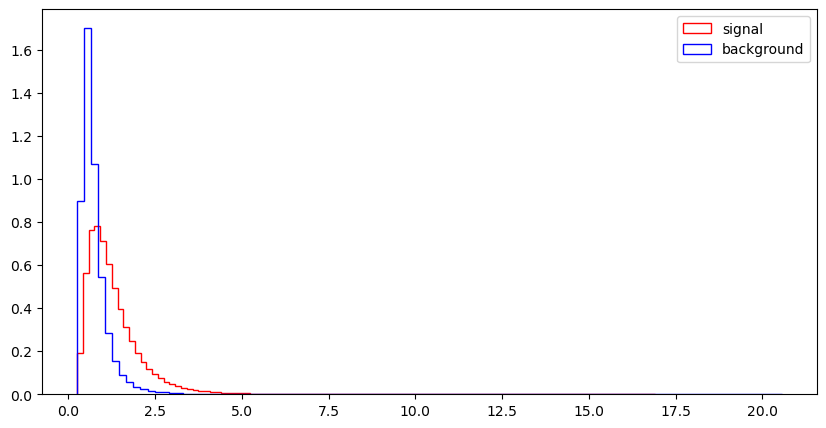

l_1_eta


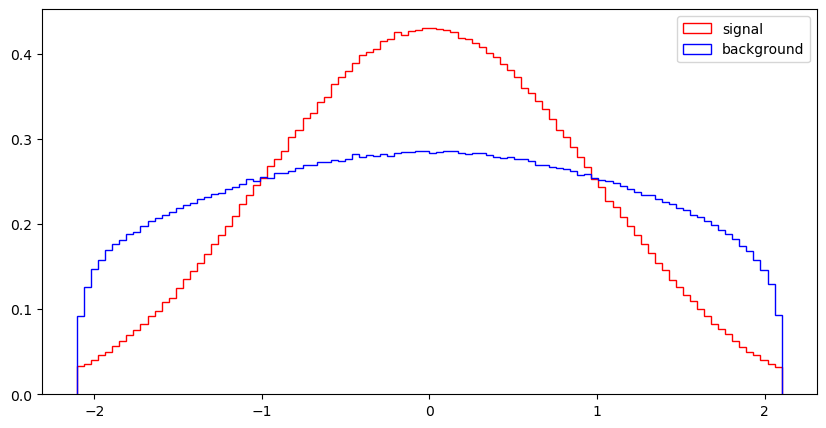

l_1_phi


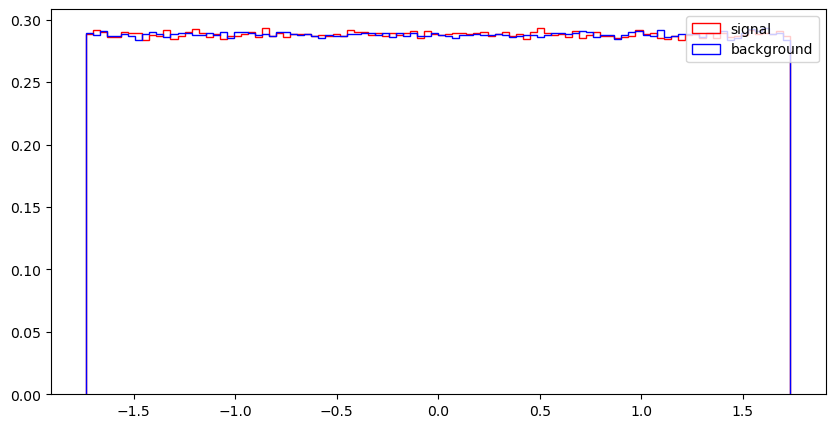

l_2_pT


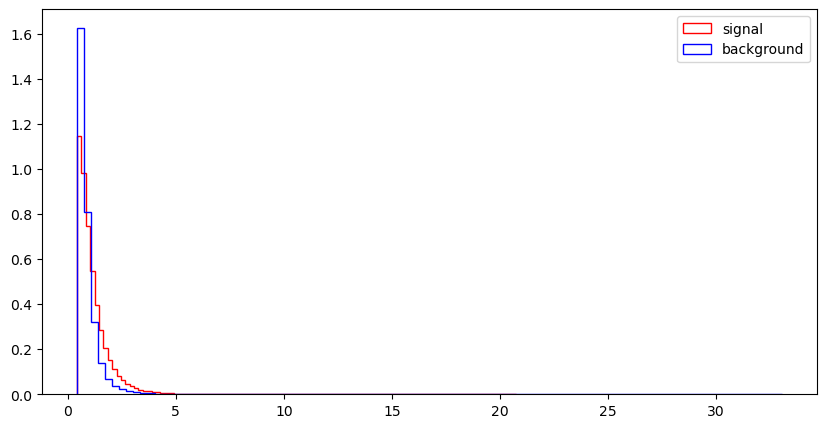

l_2_eta


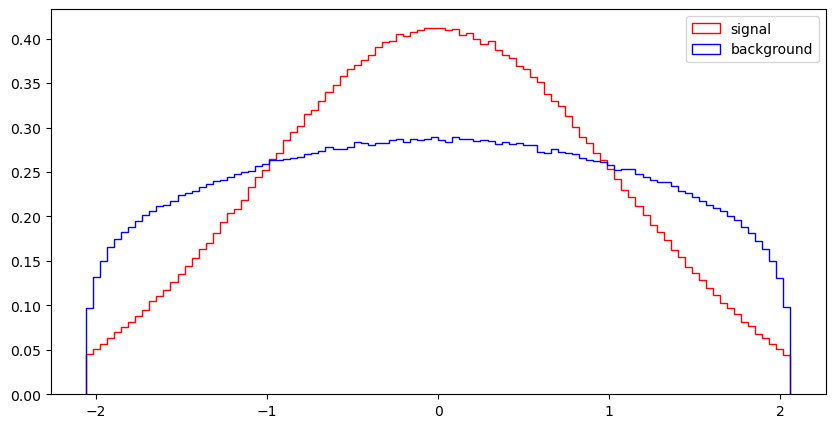

l_2_phi


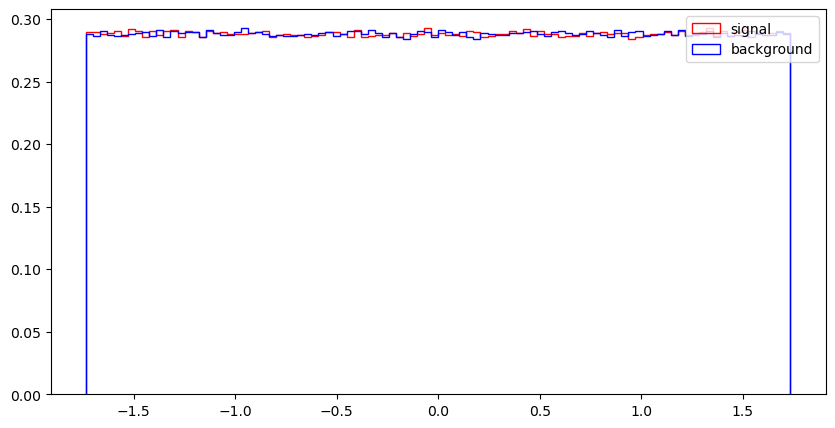

MET


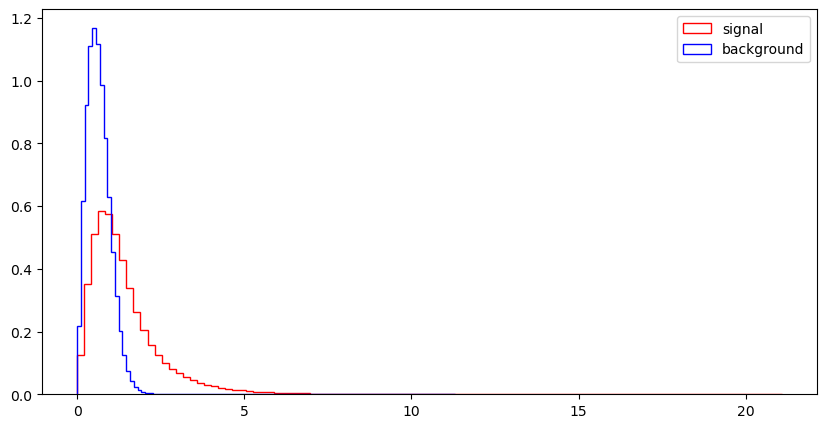

MET_phi


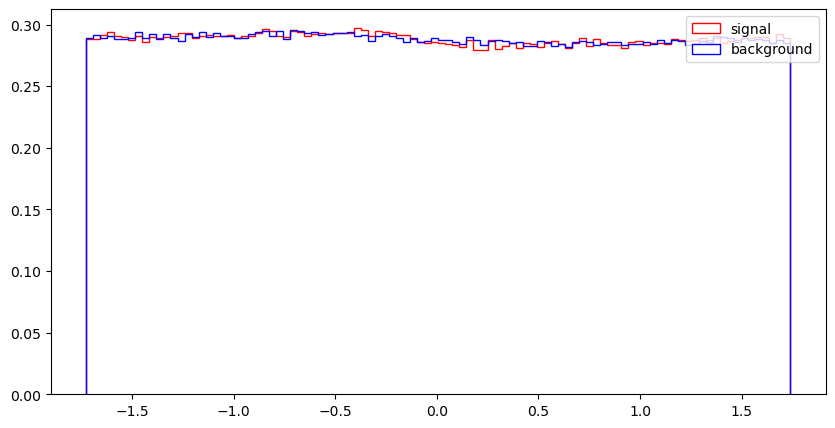

MET_rel


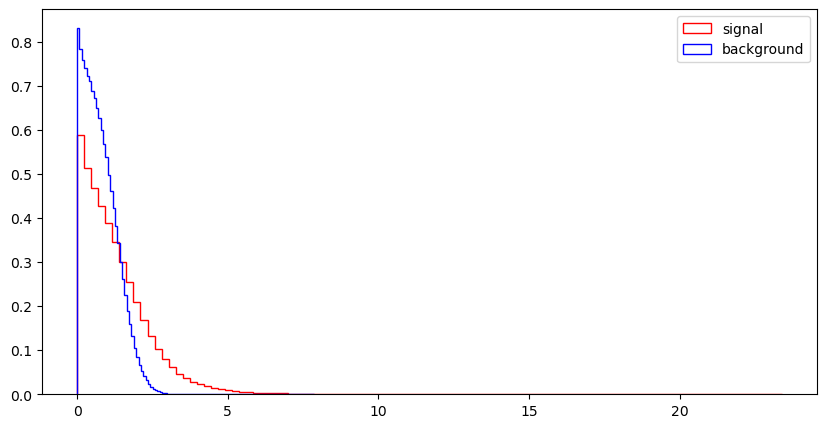

axial_MET


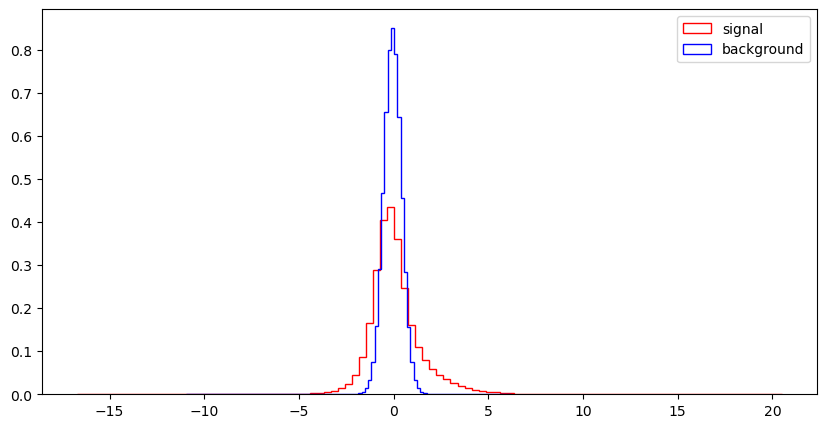

M_R


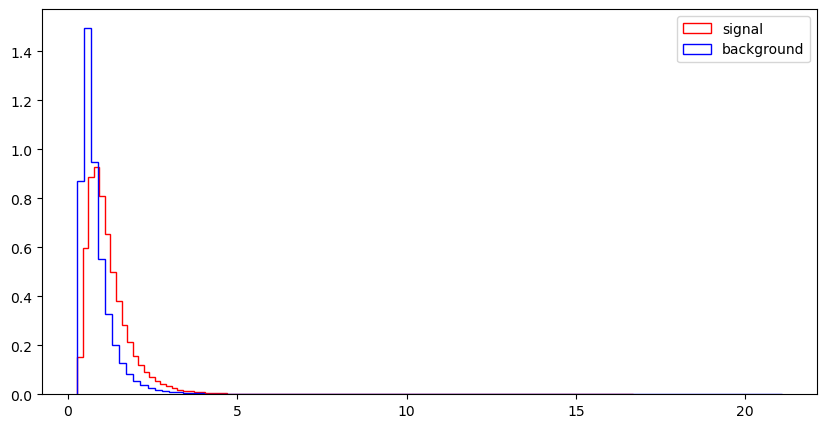

M_TR_2


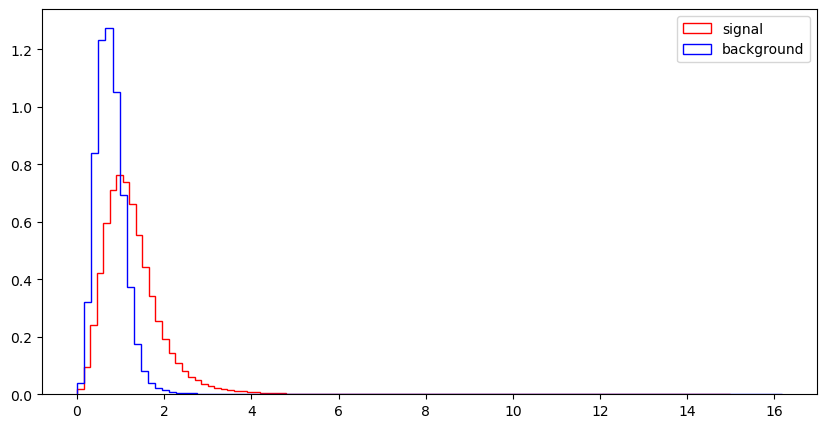

R


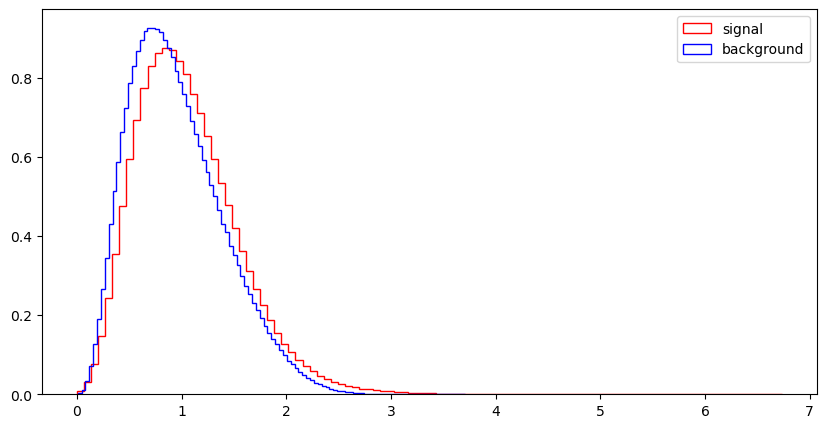

MT2


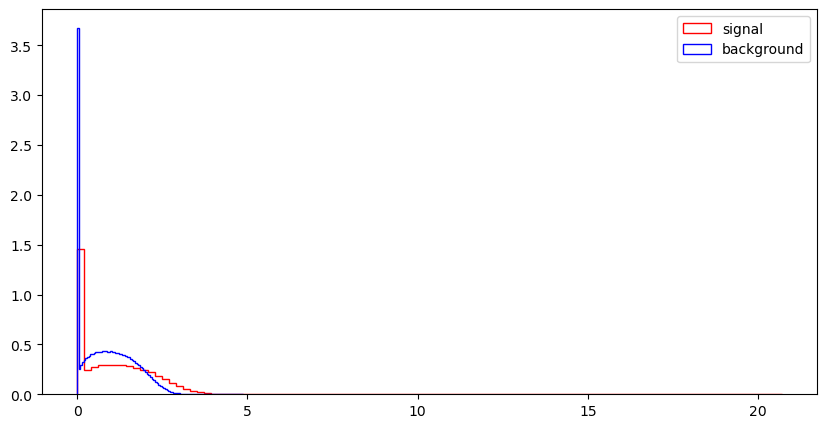

S_R


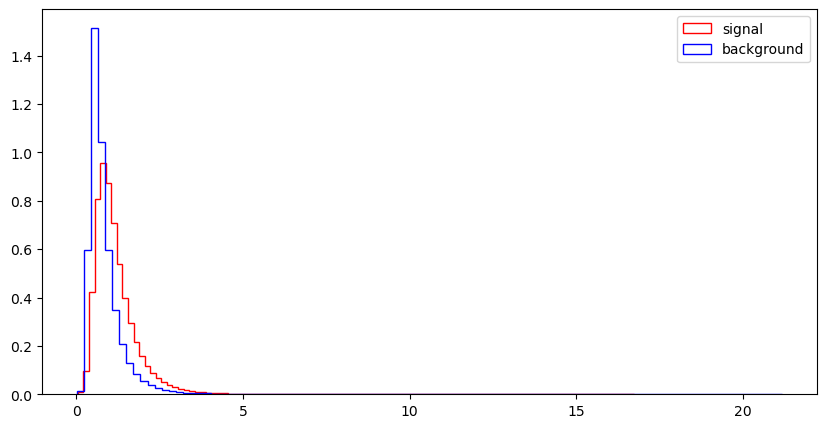

M_Delta_R


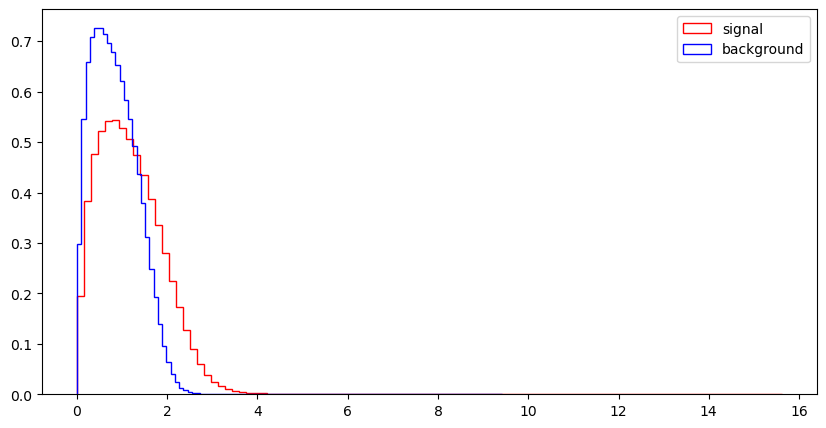

dPhi_r_b


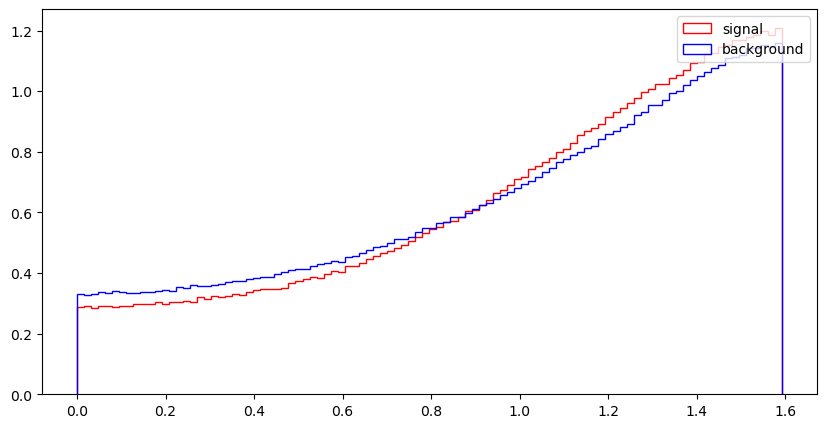

cos_theta_r1


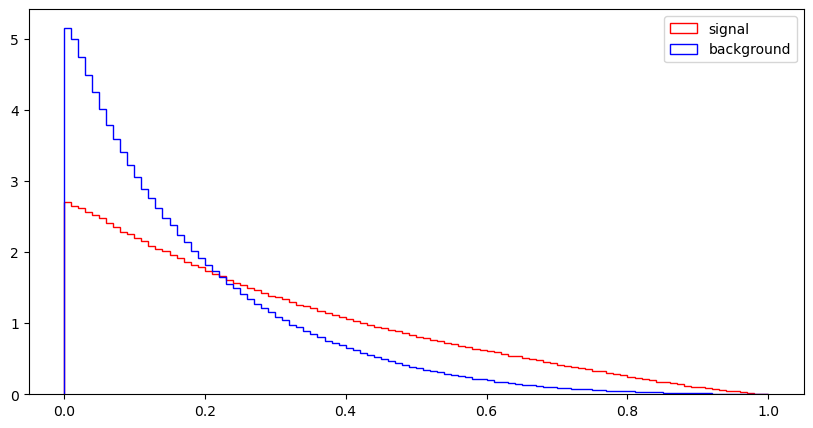

In [35]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

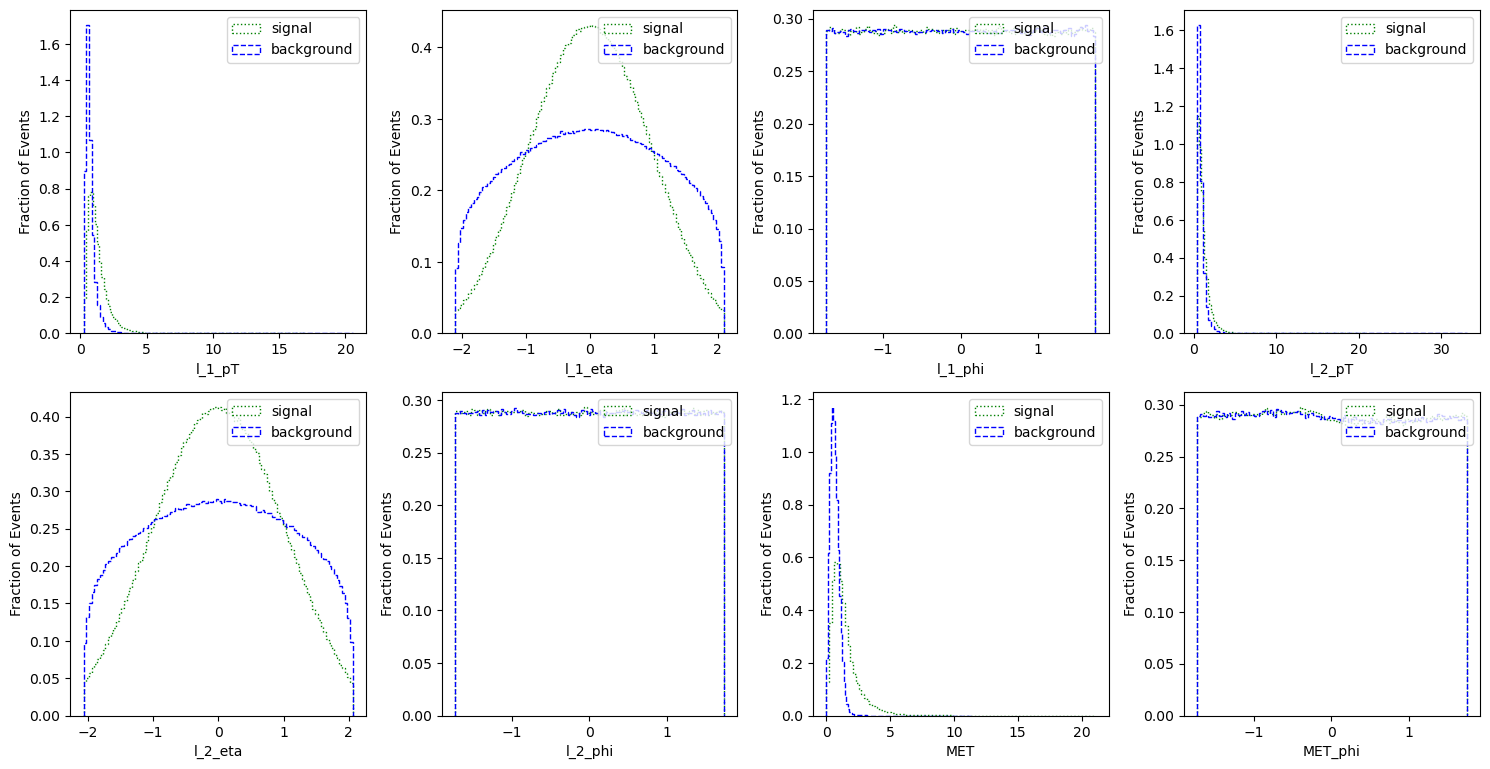

In [36]:
# figures for RawNames
plt.figure(figsize = (15,15)) # grid for figures

for i,var in enumerate(RawNames): # going through ea. var
    plt.subplot(4,4,i+1) # will have 4 x 4 layout
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="green",label="signal",linestyle='dotted',density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",linestyle='dashed',density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(var, loc='center') # picking location to where labels can be 
    plt.ylabel('Fraction of Events', loc = 'center')
plt.tight_layout() # padding betwn & around subplots
plt.show()

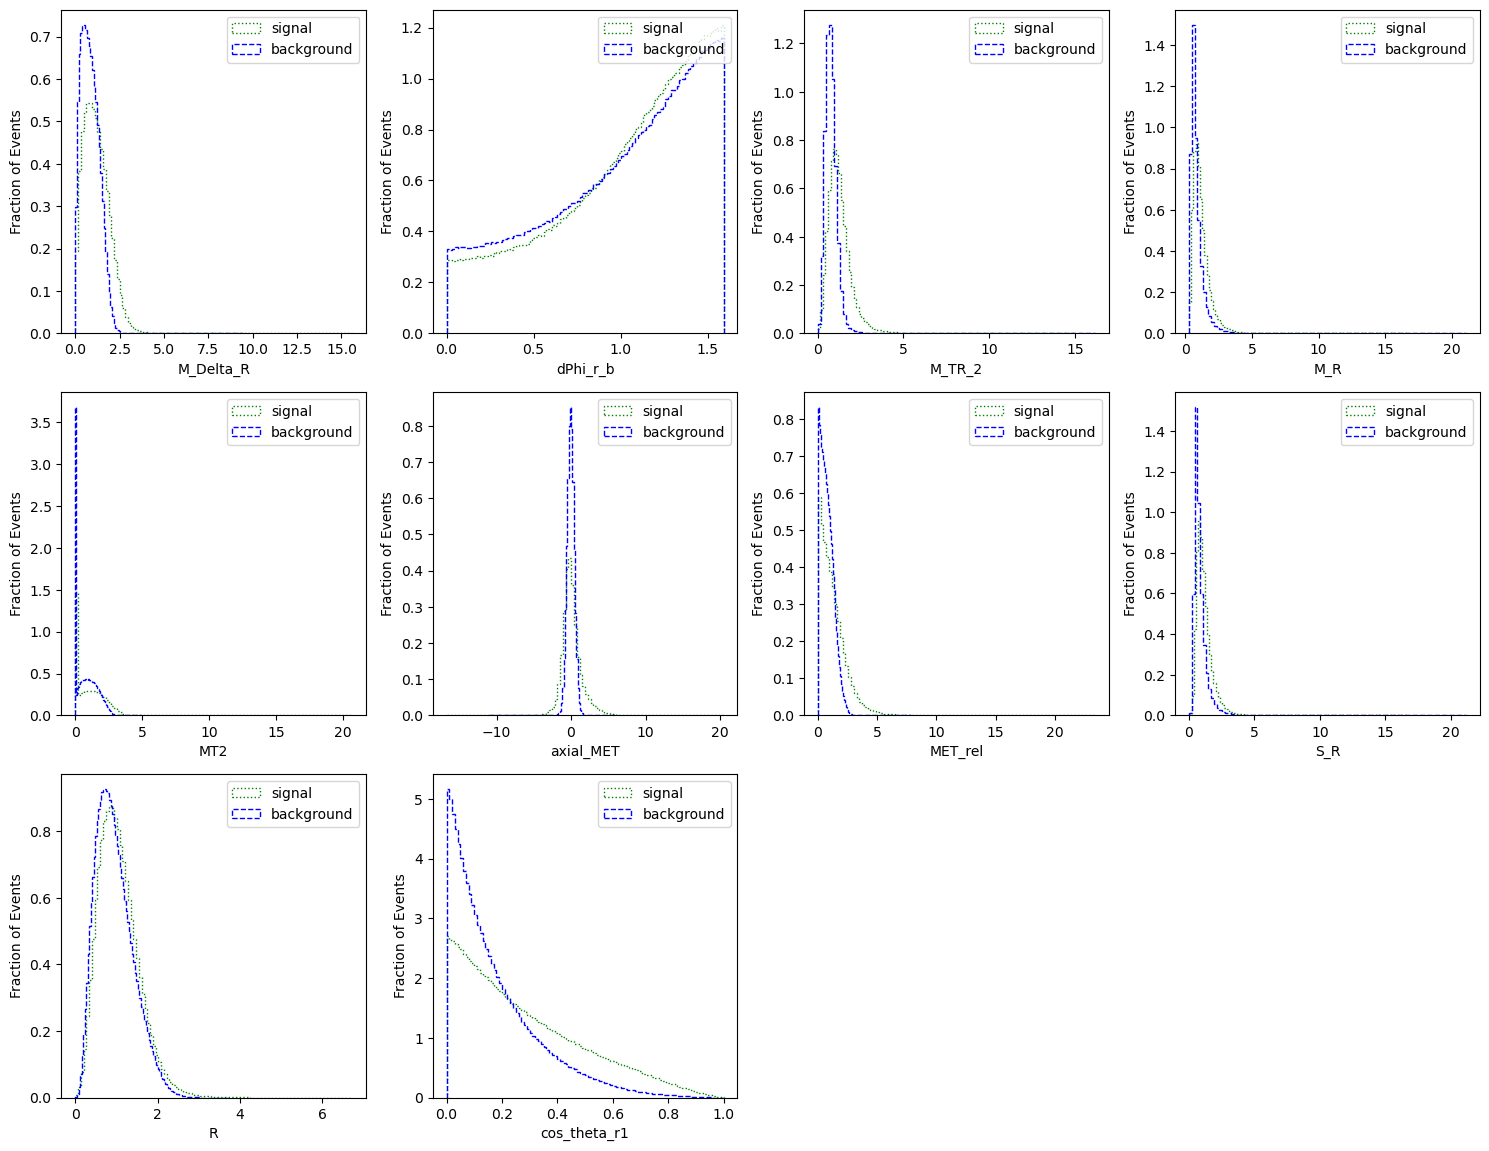

In [102]:
# figures for FeatureNames
plt.figure(figsize = (15,15)) # grid for figures

for i,var in enumerate(FeatureNames): # going through ea. var
    plt.subplot(4,4,i+1) # will have 4 x 4 layout
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="green",label="signal",linestyle='dotted',density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",linestyle='dashed',density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(var, loc='center') # picking location to where labels can be 
    plt.ylabel('Fraction of Events', loc = 'center')
plt.tight_layout() # padding betwn & around subplots
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [38]:
# part 4.1.a 
# got from lecture 13 to create pairplot later 

# compare distributions from selections in df using hisograms
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,**kwargs) # plot. histograms

    _=plt.legend() 

# compare scatterplots from selections from df
def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label) # plot scatterplots

    _=plt.xlabel(x_var_name) 
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()

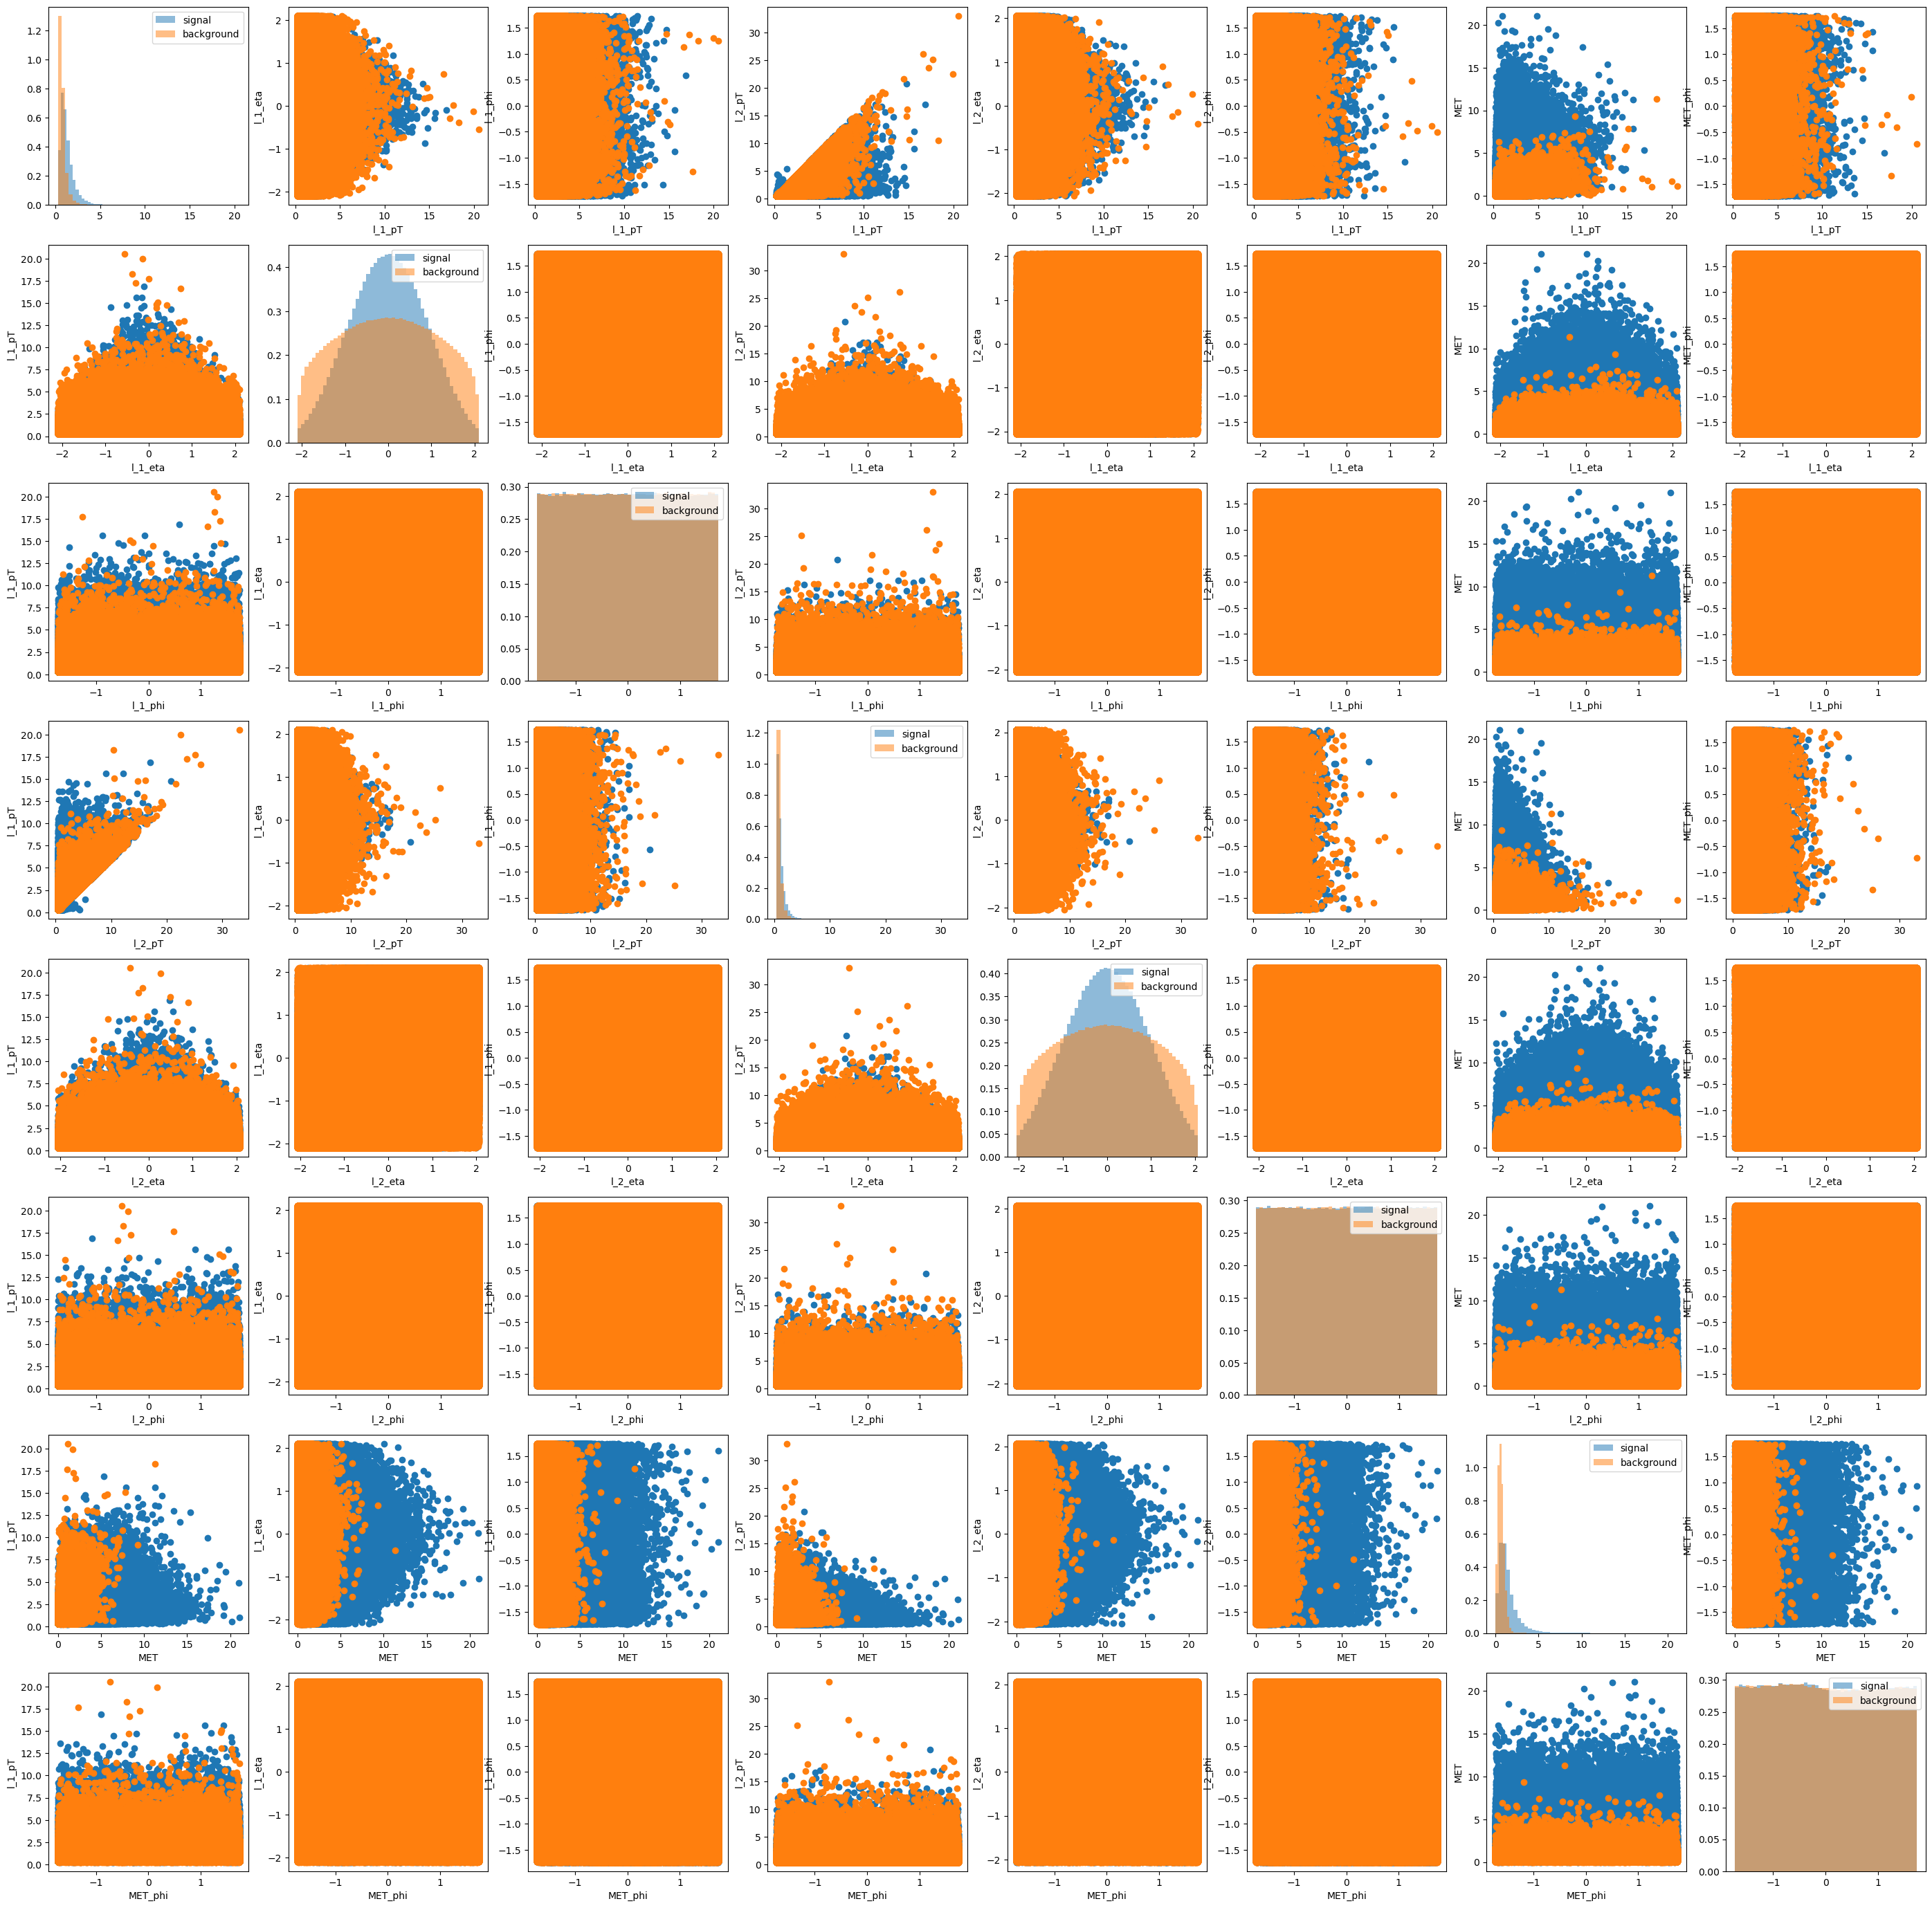

In [39]:
# low level feature pairplot 

selection_dict={"signal":df["signal"]==1.,"background":df["signal"]==0}
n_columns=len(RawNames)
plt.figure(figsize=(35,35))

plot_i= 0 # counter to track of current subplot

for i,x_var_name in enumerate(RawNames):
    for j,y_var_name in enumerate(RawNames): 
        plot_i+=1 # incremate counter to next subplot
        plt.subplot(n_columns,n_columns,plot_i) # make new subplot
        make_legend = plot_i==1 # determines whether to make legend
        if i==j: # if features are same
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else: # # if features are diff
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

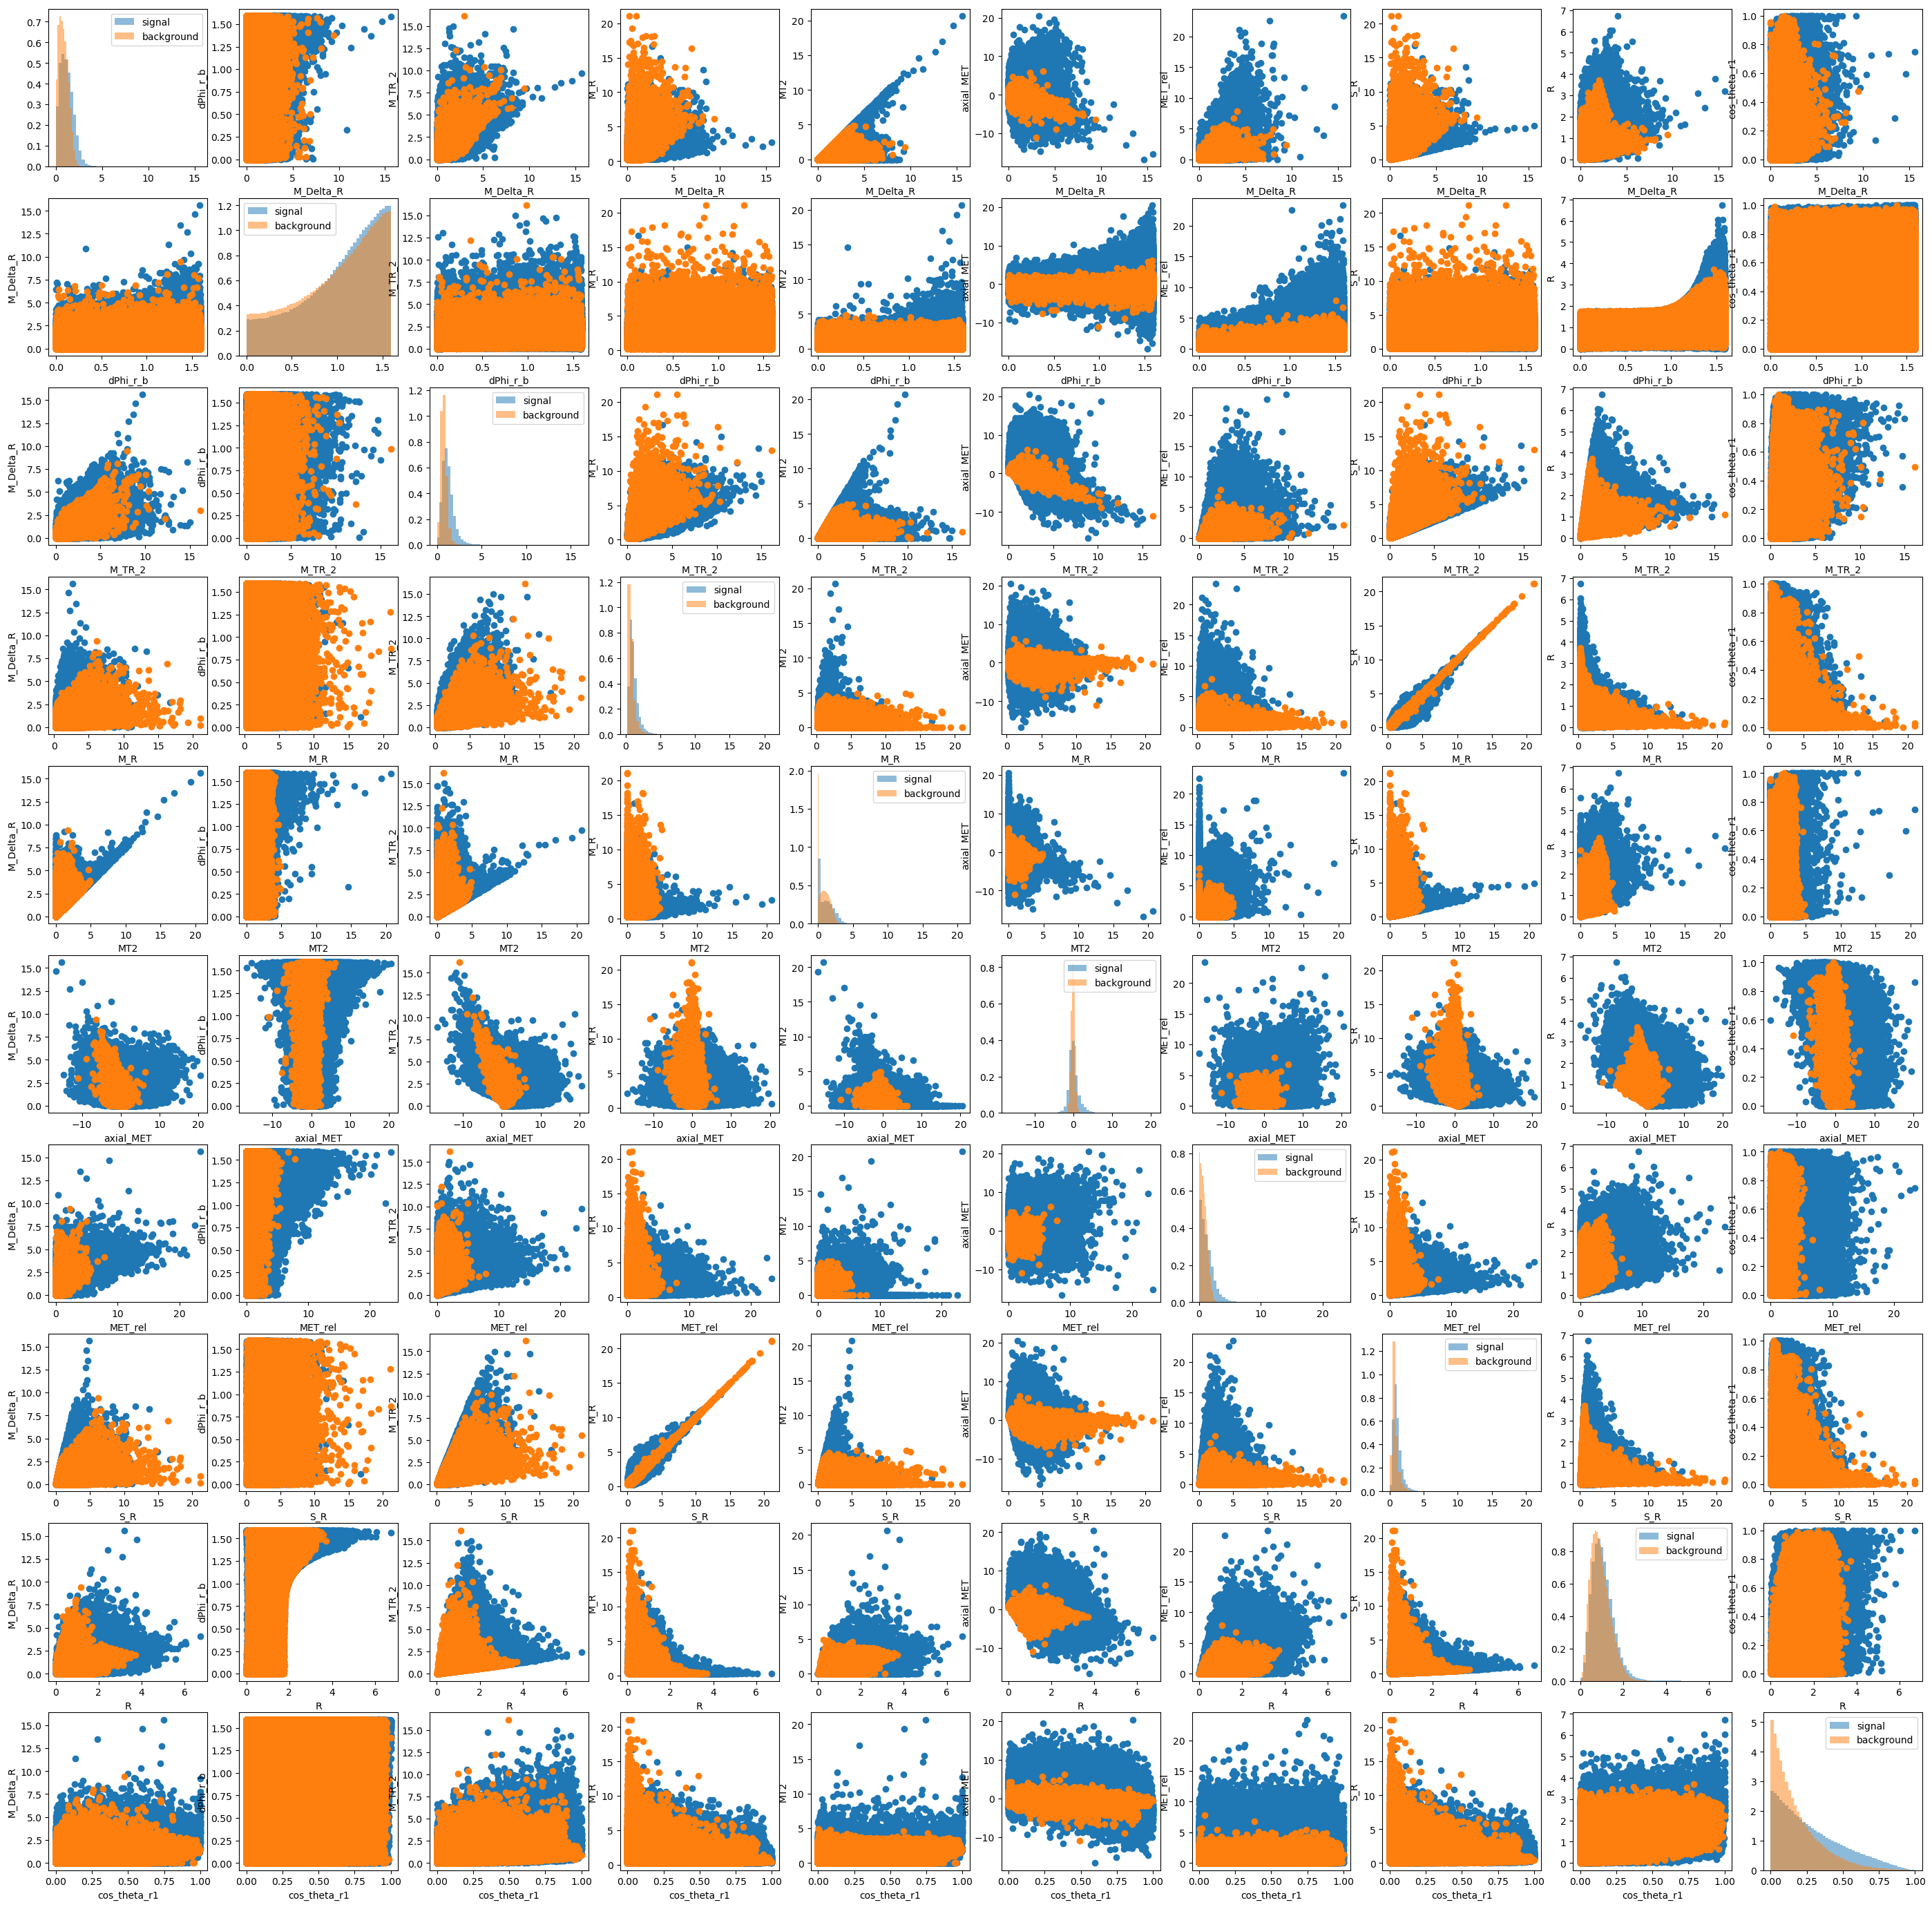

In [41]:
# high level feature pairplot

selection_dict={"signal":df["signal"]==1.,"background":df["signal"]==0}
n_columns=len(FeatureNames)
plt.figure(figsize=(35,35))

plot_i= 0 # # counter to track of current subplot

for i,x_var_name in enumerate(FeatureNames):
    for j,y_var_name in enumerate(FeatureNames): 
        plot_i+=1 # incremate counter to next subplot
        plt.subplot(n_columns,n_columns,plot_i) # make new subplot
        make_legend = plot_i==1 # determines whether to make legend
        if i==j: # if features are same
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else: # if features are diff.
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

In [81]:
# part 4.1.b ??????????

# combine low and high features to speed it up
def combine_pairplot(df):
    
    combine_low_high = pd.concat([RawNames, FeatureNames], axis=1) # join low & high using concat() 
        
    # now use code from part a & b 
    selection_dict={"signal":df["signal"]==1.,"background":df["signal"]==0}
    n_columns=len(combine_low_high)
    plt.figure(figsize=(35,35))

    plot_i= 0 # counter to track of current subplot

    for i,x_var_name in enumerate(combine_low_high):
        for j,y_var_name in enumerate(combine_low_high): 
            plot_i+=1 # incremate counter to next subplot
            plt.subplot(n_columns,n_columns,plot_i) # make new subplot
            make_legend = plot_i==1 # determines whether to make legend
            if i==j: # if features are same
                compare_distributions(df,x_var_name,
                         selection_dict,
                         alpha=0.5,
                         density=1,
                         bins=50,
                         )
            else: # if features are diff.
                compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [22]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [82]:
# part 4.2.a

import tabulate # did pip install tabulate in terminal

In [105]:
# part 4.2.b

low_feat = ['l_1_pT','l_1_eta', 'l_1_phi','l_2_pT',
            'l_2_eta','l_2_phi','MET','MET_phi'] # basically RawNames

high_feat = ['M_Delta_R','dPhi_r_b','M_TR_2','M_R','MT2',
             'axial_MET','MET_rel','S_R','R','cos_theta_r1'] # basically FeatureNames

low_n_high = low_feat + high_feat # combine low and high 

# low features: covariance, correlation matrix
low_covar = np.cov(df[low_feat], rowvar = False)
low_corr = np.corrcoef(df[low_feat], rowvar = False)

print("Low Level Features")
print("\nCovariance Matrix:", low_covar)
print("\nCorrelation Matrix:", low_corr)

# high features: covariance, correlation matrix
high_covar = np.cov(df[high_feat], rowvar = False)
high_corr = np.corrcoef(df[high_feat], rowvar = False)

print("\n\nHigh Level Features")
print("\nCovariance Matrix:", high_covar)
print("\nCorrelation Matrix:", high_corr)


# low & high features: covariance, correlation matrix
low_n_high_covar = np.cov(df[low_n_high], rowvar = False)
low_n_high_corr = np.corrcoef(df[low_n_high], rowvar = False)

print("\n\nLow & High Level Features")
print("\nCovariance Matrix:", low_n_high_covar)
print("\nCorrelation Matrix:", low_n_high_corr)

Low Level Features

Covariance Matrix: [[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
  -4.54288205e-04  1.14725700e-04  7.97039608e-02 -1.38807284e-03]
 [-3.02456872e-04  4.05877394e-01  6.41115931e-04 -4.54288205e-04
   1.00568572e+00 -6.47265749e-05  5.11898819e-05 -1.25591734e-04]
 [ 2.27164310e-04  2.97083862e-04 -2.68130132e-01  1.14725700e-04
  -6.47265749e-05  1.00326487e+00  4.32091479e-06 -3.44683883e-02]
 [ 2.30950772e-01 -5.57684419e-04  1.20012378e-03  7.97039608e-02
   5.11898819e-05  4.32091479e-06  7.61932857e-01 -1.62175466e-03]
 [-6.76375484e-04 -5.40623754e

In [92]:
# part 4.2.c 

### for Low Level  Features

# covar for low 
print("Low Level Features")
print("\nCovariance:")
display(HTML(tabulate.tabulate(low_covar, tablefmt='html', headers=low_feat, showindex=low_feat)))

print("\n----------------------------------- \n") # so i can see clearly 

# corr for low 
print("\nCorrelation:")
display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_feat, showindex=low_feat)))

Low Level Features

Covariance:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331



----------------------------------- 


Correlation:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1


In [93]:
# part 4.2.c 

### for High Level Features

# covar for high 
print("High Level Features")
print("\nCovariance:")
display(HTML(tabulate.tabulate(high_covar, tablefmt='html', headers= high_feat, showindex=high_feat)))

print("\n----------------------------------- \n") # so i can see clearly 

# corr for high 
print("\nCorrelation:")
display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_feat, showindex=high_feat)))

High Level Features

Covariance:


,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
M_Delta_R,0.389086,0.0423863,0.242487,0.0742776,0.433327,-0.234103,0.415675,0.0961442,0.165647,0.0392001
dPhi_r_b,0.0423863,0.190179,0.0581329,-0.0291322,0.0211701,-0.0262092,0.146597,-0.00363167,0.087129,0.00912875
M_TR_2,0.242487,0.0581329,0.341189,0.212154,0.189498,-0.188739,0.303346,0.230448,0.104464,0.0519458
M_R,0.0742776,-0.0291322,0.212154,0.395446,-0.0366234,0.0151046,0.043706,0.383059,-0.112922,-0.0141941
MT2,0.433327,0.0211701,0.189498,-0.0366234,0.738309,-0.460312,0.410022,-0.0111659,0.232203,0.0445295
axial_MET,-0.234103,-0.0262092,-0.188739,0.0151046,-0.460312,1.00319,-0.125273,-0.0434172,-0.18164,-0.0541256
MET_rel,0.415675,0.146597,0.303346,0.043706,0.410022,-0.125273,0.792397,0.0824171,0.249511,0.055605
S_R,0.0961442,-0.00363167,0.230448,0.383059,-0.0111659,-0.0434172,0.0824171,0.385289,-0.0834283,-0.0102231
R,0.165647,0.087129,0.104464,-0.112922,0.232203,-0.18164,0.249511,-0.0834283,0.221691,0.0581794
cos_theta_r1,0.0392001,0.00912875,0.0519458,-0.0141941,0.0445295,-0.0541256,0.055605,-0.0102231,0.0581794,0.0388013



----------------------------------- 


Correlation:


,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
M_Delta_R,1,0.155819,0.665531,0.189362,0.808488,-0.374708,0.748617,0.248317,0.564009,0.319037
dPhi_r_b,0.155819,1,0.228214,-0.106231,0.0564966,-0.0600043,0.377634,-0.0134163,0.424334,0.106269
M_TR_2,0.665531,0.228214,1,0.577579,0.377562,-0.322606,0.583403,0.635598,0.379836,0.451471
M_R,0.189362,-0.106231,0.577579,1,-0.0677791,0.0239815,0.0780776,0.98136,-0.381384,-0.114588
MT2,0.808488,0.0564966,0.377562,-0.0677791,1,-0.534862,0.536064,-0.0209354,0.573951,0.263091
axial_MET,-0.374708,-0.0600043,-0.322606,0.0239815,-0.534862,1,-0.140506,-0.0698356,-0.385164,-0.274339
MET_rel,0.748617,0.377634,0.583403,0.0780776,0.536064,-0.140506,1,0.14916,0.595311,0.317117
S_R,0.248317,-0.0134163,0.635598,0.98136,-0.0209354,-0.0698356,0.14916,1,-0.285461,-0.0836113
R,0.564009,0.424334,0.379836,-0.381384,0.573951,-0.385164,0.595311,-0.285461,1,0.627296
cos_theta_r1,0.319037,0.106269,0.451471,-0.114588,0.263091,-0.274339,0.317117,-0.0836113,0.627296,1


In [90]:
# part 4.2.c 

### for Low Level & High Level Features

# covar for low and high 
print("Low Level & High Level Features")
print("\nCovariance:")
display(HTML(tabulate.tabulate(low_n_high_covar, tablefmt='html', headers=low_n_high, showindex=low_n_high)))

print("\n----------------------------------- \n") # so i can see clearly 

# corr for low and high 
print("\nCorrelation:")
display(HTML(tabulate.tabulate(low_n_high_corr, tablefmt='html', headers=low_n_high, showindex=low_n_high)))

Low Level & High Level Features

Covariance:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375,0.0980831,-0.0470231,0.290831,0.368085,-0.0127782,-0.0125117,0.0985665,0.346283,-0.0592849,0.0225171
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624,-0.000504145,7.96493e-05,-0.0002659,-0.000308117,-0.000157618,-0.000497512,-0.000496646,-0.000281414,0.000127738,0.000145749
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184,0.00131238,0.000953611,0.000837778,-0.000199693,0.00175405,-0.00196469,0.00152891,4.49584e-05,0.000876413,0.0002995
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807,0.00555216,-0.0041175,0.164385,0.328115,-0.0691387,0.0497971,-0.00225873,0.324622,-0.0993157,-0.0277963
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592,-0.000214547,-5.15597e-05,-0.000167207,-0.000548914,-9.06262e-05,-0.000170132,0.000129885,-0.000553613,0.000253423,0.000198699
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684,0.000496384,0.000243671,0.000288007,0.000286821,0.00124351,-9.13545e-05,0.000214381,0.000383544,0.00023464,-0.000198602
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175,0.316608,0.145279,0.368099,0.145918,0.156388,0.144805,0.548358,0.16733,0.18855,0.0732584
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331,-0.000398585,-0.00132321,-0.000842059,-0.000975646,0.000505462,-0.000953142,-0.00291959,-0.00114068,-0.000163381,5.77751e-05
M_Delta_R,0.0980831,-0.000504145,0.00131238,0.00555216,-0.000214547,0.000496384,0.316608,-0.000398585,0.389086,0.0423863,0.242487,0.0742776,0.433327,-0.234103,0.415675,0.0961442,0.165647,0.0392001
dPhi_r_b,-0.0470231,7.96493e-05,0.000953611,-0.0041175,-5.15597e-05,0.000243671,0.145279,-0.00132321,0.0423863,0.190179,0.0581329,-0.0291322,0.0211701,-0.0262092,0.146597,-0.00363167,0.087129,0.00912875



----------------------------------- 


Correlation:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431,0.228773,-0.156878,0.724394,0.851602,-0.0216362,-0.0181743,0.161098,0.811653,-0.18319,0.166311
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059,-0.000805723,0.000182076,-0.000453809,-0.000488455,-0.000182869,-0.000495182,-0.000556196,-0.000451966,0.000270458,0.000737625
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573,0.00210045,0.00218306,0.00143188,-0.000317026,0.00203798,-0.0019583,0.00171469,7.2309e-05,0.00185828,0.00151792
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822,0.0136055,-0.0144321,0.430171,0.797551,-0.122992,0.0759957,-0.00387855,0.799394,-0.322419,-0.215695
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029,-0.000342981,-0.000117896,-0.000285448,-0.000870422,-0.000105173,-0.00016938,0.000145498,-0.000889368,0.000536711,0.00100587
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554,0.000794488,0.000557847,0.000492263,0.000455365,0.00144484,-9.10606e-05,0.000240441,0.000616899,0.000497531,-0.00100659
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485,0.581489,0.381648,0.721952,0.265832,0.20851,0.165628,0.705724,0.308832,0.45877,0.426065
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1,-0.000637942,-0.00302921,-0.00143922,-0.00154893,0.000587288,-0.000950054,-0.0032744,-0.00183464,-0.000346425,0.00029282
M_Delta_R,0.228773,-0.000805723,0.00210045,0.0136055,-0.000342981,0.000794488,0.581489,-0.000637942,1,0.155819,0.665531,0.189362,0.808488,-0.374708,0.748617,0.248317,0.564009,0.319037
dPhi_r_b,-0.156878,0.000182076,0.00218306,-0.0144321,-0.000117896,0.000557847,0.381648,-0.00302921,0.155819,1,0.228214,-0.106231,0.0564966,-0.0600043,0.377634,-0.0134163,0.424334,0.106269


In [97]:
# part 4.2.d 

# will be combining all my previous code 

def corr_covar_table(data, low_feat, high_feat, low_n_high): # make fcn that can do b & c (covar/corr & tables)
    
    # low level 
    print("Low Level Features")
    low_covar = np.cov(df[low_feat], rowvar = False)
    low_corr = np.corrcoef(df[low_feat], rowvar = False)

    print("\nCovariance Matrix:", low_covar)
    print("\nCorrelation Matrix:", low_corr)
    
    print("\nCovariance:")
    display(HTML(tabulate.tabulate(low_covar, tablefmt='html', headers=low_feat, showindex=low_feat)))

    print("\n----------------------------------- \n") 

    print("\nCorrelation:")
    display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_feat, showindex=low_feat)))
    
    
    # high level
    print("\n\nHigh Level Features")
    high_covar = np.cov(df[high_feat], rowvar = False)
    high_corr = np.corrcoef(df[high_feat], rowvar = False)

    print("\nCovariance Matrix:", high_covar)
    print("\nCorrelation Matrix:", high_corr)
    
    print("\nCovariance:")
    display(HTML(tabulate.tabulate(high_covar, tablefmt='html', headers= high_feat, showindex=high_feat)))

    print("\n----------------------------------- \n") 
 
    print("\nCorrelation:")
    display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_feat, showindex=high_feat)))

    
    # low and high 
    print("\n\nLow & High Level Features")
    low_n_high_covar = np.cov(df[low_n_high], rowvar = False)
    low_n_high_corr = np.corrcoef(df[low_n_high], rowvar = False)

    print("\nCovariance Matrix:", low_n_high_covar)
    print("\nCorrelation Matrix:", low_n_high_corr)

    print("\nCovariance:")
    display(HTML(tabulate.tabulate(low_n_high_covar, tablefmt='html', headers=low_n_high, showindex=low_n_high)))

    print("\n----------------------------------- \n") # so i can see clearly 

    print("\nCorrelation:")
    display(HTML(tabulate.tabulate(low_n_high_corr, tablefmt='html', headers=low_n_high, showindex=low_n_high)))

In [99]:
# test fcn 

corr_covar_table(df, low_feat, high_feat, low_n_high)

Low Level Features

Covariance Matrix: [[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
  -4.54288205e-04  1.14725700e-04  7.97039608e-02 -1.38807284e-03]
 [-3.02456872e-04  4.05877394e-01  6.41115931e-04 -4.54288205e-04
   1.00568572e+00 -6.47265749e-05  5.11898819e-05 -1.25591734e-04]
 [ 2.27164310e-04  2.97083862e-04 -2.68130132e-01  1.14725700e-04
  -6.47265749e-05  1.00326487e+00  4.32091479e-06 -3.44683883e-02]
 [ 2.30950772e-01 -5.57684419e-04  1.20012378e-03  7.97039608e-02
   5.11898819e-05  4.32091479e-06  7.61932857e-01 -1.62175466e-03]
 [-6.76375484e-04 -5.40623754e

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331



----------------------------------- 


Correlation:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1




High Level Features

Covariance Matrix: [[ 0.38908552  0.04238627  0.24248702  0.07427758  0.43332669 -0.23410285
   0.41567466  0.0961442   0.16564653  0.03920007]
 [ 0.04238627  0.19017871  0.05813285 -0.02913224  0.02117007 -0.02620925
   0.14659656 -0.00363167  0.08712903  0.00912875]
 [ 0.24248702  0.05813285  0.34118908  0.21215446  0.1894982  -0.18873918
   0.30334551  0.23044835  0.10446411  0.05194578]
 [ 0.07427758 -0.02913224  0.21215446  0.39544556 -0.03662338  0.01510465
   0.04370602  0.38305852 -0.11292219 -0.01419408]
 [ 0.43332669  0.02117007  0.1894982  -0.03662338  0.73830903 -0.46031246
   0.4100222  -0.01116591  0.23220317  0.04452951]
 [-0.23410285 -0.02620925 -0.18873918  0.01510465 -0.46031246  1.00318956
  -0.12527291 -0.04341721 -0.18163966 -0.05412562]
 [ 0.41567466  0.14659656  0.30334551  0.04370602  0.4100222  -0.12527291
   0.79239696  0.0824171   0.24951055  0.05560498]
 [ 0.0961442  -0.00363167  0.23044835  0.38305852 -0.01116591 -0.04341721
   0.0824

,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
M_Delta_R,0.389086,0.0423863,0.242487,0.0742776,0.433327,-0.234103,0.415675,0.0961442,0.165647,0.0392001
dPhi_r_b,0.0423863,0.190179,0.0581329,-0.0291322,0.0211701,-0.0262092,0.146597,-0.00363167,0.087129,0.00912875
M_TR_2,0.242487,0.0581329,0.341189,0.212154,0.189498,-0.188739,0.303346,0.230448,0.104464,0.0519458
M_R,0.0742776,-0.0291322,0.212154,0.395446,-0.0366234,0.0151046,0.043706,0.383059,-0.112922,-0.0141941
MT2,0.433327,0.0211701,0.189498,-0.0366234,0.738309,-0.460312,0.410022,-0.0111659,0.232203,0.0445295
axial_MET,-0.234103,-0.0262092,-0.188739,0.0151046,-0.460312,1.00319,-0.125273,-0.0434172,-0.18164,-0.0541256
MET_rel,0.415675,0.146597,0.303346,0.043706,0.410022,-0.125273,0.792397,0.0824171,0.249511,0.055605
S_R,0.0961442,-0.00363167,0.230448,0.383059,-0.0111659,-0.0434172,0.0824171,0.385289,-0.0834283,-0.0102231
R,0.165647,0.087129,0.104464,-0.112922,0.232203,-0.18164,0.249511,-0.0834283,0.221691,0.0581794
cos_theta_r1,0.0392001,0.00912875,0.0519458,-0.0141941,0.0445295,-0.0541256,0.055605,-0.0102231,0.0581794,0.0388013



----------------------------------- 


Correlation:


,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
M_Delta_R,1,0.155819,0.665531,0.189362,0.808488,-0.374708,0.748617,0.248317,0.564009,0.319037
dPhi_r_b,0.155819,1,0.228214,-0.106231,0.0564966,-0.0600043,0.377634,-0.0134163,0.424334,0.106269
M_TR_2,0.665531,0.228214,1,0.577579,0.377562,-0.322606,0.583403,0.635598,0.379836,0.451471
M_R,0.189362,-0.106231,0.577579,1,-0.0677791,0.0239815,0.0780776,0.98136,-0.381384,-0.114588
MT2,0.808488,0.0564966,0.377562,-0.0677791,1,-0.534862,0.536064,-0.0209354,0.573951,0.263091
axial_MET,-0.374708,-0.0600043,-0.322606,0.0239815,-0.534862,1,-0.140506,-0.0698356,-0.385164,-0.274339
MET_rel,0.748617,0.377634,0.583403,0.0780776,0.536064,-0.140506,1,0.14916,0.595311,0.317117
S_R,0.248317,-0.0134163,0.635598,0.98136,-0.0209354,-0.0698356,0.14916,1,-0.285461,-0.0836113
R,0.564009,0.424334,0.379836,-0.381384,0.573951,-0.385164,0.595311,-0.285461,1,0.627296
cos_theta_r1,0.319037,0.106269,0.451471,-0.114588,0.263091,-0.274339,0.317117,-0.0836113,0.627296,1




Low & High Level Features

Covariance Matrix: [[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04
   9.80831420e-02 -4.70231189e-02  2.90830895e-01  3.68084648e-01
  -1.27781651e-02 -1.25117429e-02  9.85665087e-02  3.46283105e-01
  -5.92849382e-02  2.25170535e-02]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04
  -5.04145408e-04  7.96492827e-05 -2.65899836e-04 -3.08116876e-04
  -1.57618075e-04 -4.97511845e-04 -4.96645666e-04 -2.81414480e-04
   1.27738268e-04  1.45749083e-04]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01
   1.31238252e-03  9.53611330e-04  8.37778126e-04 -1.99692758e-04
   1.75405466e-03 -1.96469455e-03  1.52891120e-03  4.49583619e-05
   8.76412682e-04  2.99499583e-04]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375,0.0980831,-0.0470231,0.290831,0.368085,-0.0127782,-0.0125117,0.0985665,0.346283,-0.0592849,0.0225171
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624,-0.000504145,7.96493e-05,-0.0002659,-0.000308117,-0.000157618,-0.000497512,-0.000496646,-0.000281414,0.000127738,0.000145749
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184,0.00131238,0.000953611,0.000837778,-0.000199693,0.00175405,-0.00196469,0.00152891,4.49584e-05,0.000876413,0.0002995
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807,0.00555216,-0.0041175,0.164385,0.328115,-0.0691387,0.0497971,-0.00225873,0.324622,-0.0993157,-0.0277963
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592,-0.000214547,-5.15597e-05,-0.000167207,-0.000548914,-9.06262e-05,-0.000170132,0.000129885,-0.000553613,0.000253423,0.000198699
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684,0.000496384,0.000243671,0.000288007,0.000286821,0.00124351,-9.13545e-05,0.000214381,0.000383544,0.00023464,-0.000198602
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175,0.316608,0.145279,0.368099,0.145918,0.156388,0.144805,0.548358,0.16733,0.18855,0.0732584
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331,-0.000398585,-0.00132321,-0.000842059,-0.000975646,0.000505462,-0.000953142,-0.00291959,-0.00114068,-0.000163381,5.77751e-05
M_Delta_R,0.0980831,-0.000504145,0.00131238,0.00555216,-0.000214547,0.000496384,0.316608,-0.000398585,0.389086,0.0423863,0.242487,0.0742776,0.433327,-0.234103,0.415675,0.0961442,0.165647,0.0392001
dPhi_r_b,-0.0470231,7.96493e-05,0.000953611,-0.0041175,-5.15597e-05,0.000243671,0.145279,-0.00132321,0.0423863,0.190179,0.0581329,-0.0291322,0.0211701,-0.0262092,0.146597,-0.00363167,0.087129,0.00912875



----------------------------------- 


Correlation:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,M_Delta_R,dPhi_r_b,M_TR_2,M_R,MT2,axial_MET,MET_rel,S_R,R,cos_theta_r1
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431,0.228773,-0.156878,0.724394,0.851602,-0.0216362,-0.0181743,0.161098,0.811653,-0.18319,0.166311
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059,-0.000805723,0.000182076,-0.000453809,-0.000488455,-0.000182869,-0.000495182,-0.000556196,-0.000451966,0.000270458,0.000737625
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573,0.00210045,0.00218306,0.00143188,-0.000317026,0.00203798,-0.0019583,0.00171469,7.2309e-05,0.00185828,0.00151792
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822,0.0136055,-0.0144321,0.430171,0.797551,-0.122992,0.0759957,-0.00387855,0.799394,-0.322419,-0.215695
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029,-0.000342981,-0.000117896,-0.000285448,-0.000870422,-0.000105173,-0.00016938,0.000145498,-0.000889368,0.000536711,0.00100587
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554,0.000794488,0.000557847,0.000492263,0.000455365,0.00144484,-9.10606e-05,0.000240441,0.000616899,0.000497531,-0.00100659
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485,0.581489,0.381648,0.721952,0.265832,0.20851,0.165628,0.705724,0.308832,0.45877,0.426065
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1,-0.000637942,-0.00302921,-0.00143922,-0.00154893,0.000587288,-0.000950054,-0.0032744,-0.00183464,-0.000346425,0.00029282
M_Delta_R,0.228773,-0.000805723,0.00210045,0.0136055,-0.000342981,0.000794488,0.581489,-0.000637942,1,0.155819,0.665531,0.189362,0.808488,-0.374708,0.748617,0.248317,0.564009,0.319037
dPhi_r_b,-0.156878,0.000182076,0.00218306,-0.0144321,-0.000117896,0.000557847,0.381648,-0.00302921,0.155819,1,0.228214,-0.106231,0.0564966,-0.0600043,0.377634,-0.0134163,0.424334,0.106269


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [42]:
# 5.1 

### 𝑥>𝑥𝑐, l_1_pT, l_2_pT, MET, MET_rel, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, cos_theta_r1 (most optimal)
# 𝑥<𝑥𝑐, none 
# |𝑥−𝜇|>𝑥𝑐, axial_MET
# |𝑥−𝜇|<𝑥𝑐, l_1_eta, l_2_eta

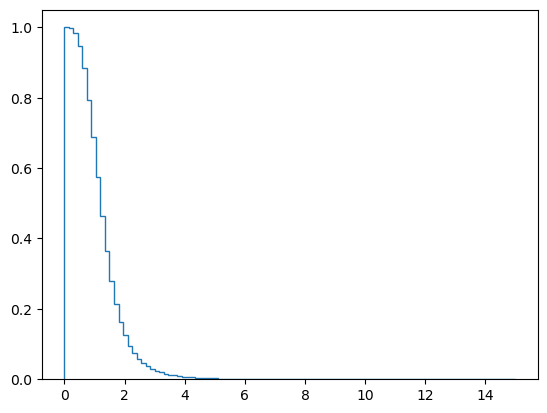

In [43]:
# 5.2 

## TPR plot (from lec. 16)
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

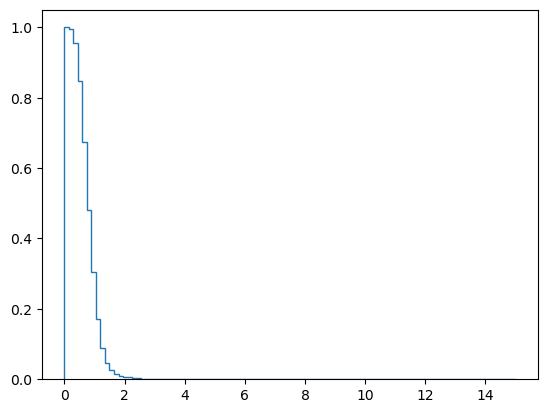

In [44]:
# 5.2

## FPR plot (from lec. 16)
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)

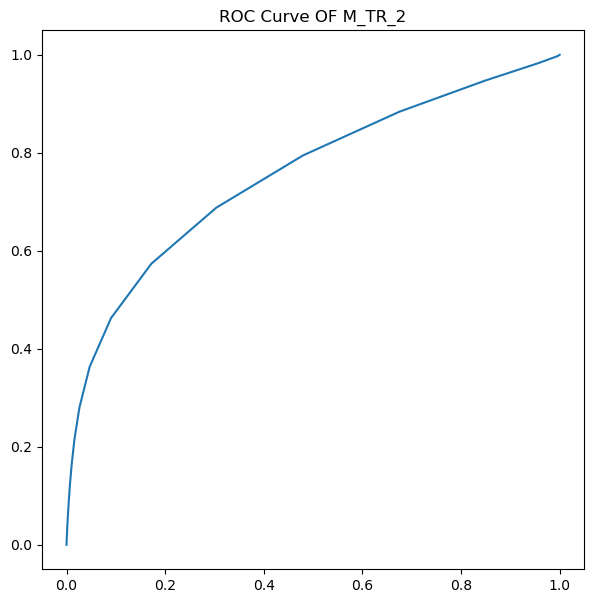

In [45]:
# 5.2 

## ROC curve
plt.figure(figsize=(7, 7))
plt.plot(FPR, TPR)
plt.title('ROC Curve OF M_TR_2')
plt.show()

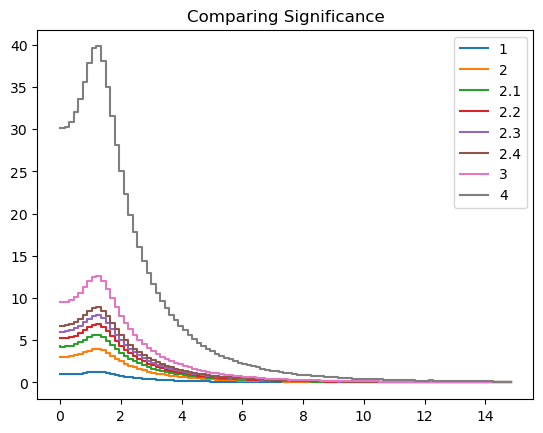

{'1': (9,
  3.6321277788923725,
  4.698005878683211,
  1.258447591175229,
  1.350293831230374),
 '2': (9,
  36.32127778892372,
  46.9800587868321,
  3.9795607040661367,
  1.350293831230374),
 '2.1': (9,
  72.64255557784745,
  93.9601175736642,
  5.627948719977353,
  1.350293831230374),
 '2.2': (9,
  108.96383336677117,
  140.9401763604963,
  6.892801331247122,
  1.350293831230374),
 '2.3': (9,
  145.2851111556949,
  187.9202351473284,
  7.959121408132273,
  1.350293831230374),
 '2.4': (9,
  181.6063889446186,
  234.90029393416052,
  8.898568254878805,
  1.350293831230374),
 '3': (9,
  363.2127778892372,
  469.80058786832103,
  12.584475911752289,
  1.350293831230374),
 '4': (9,
  3632.127778892372,
  4698.0058786832105,
  39.795607040661366,
  1.350293831230374)}

In [46]:
# 5.3

# taken from lec. 16 

# expected values 
n_bkg_expected = 10000
n_sig_expected = 1000

scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items(): # go through scenarios to find max sig

        # FPR/TPR calculation
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log: # to compare significance 
        plt.yscale("log")
    plt.title('Comparing Significance')
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [57]:
# 6.1 

# selected observables
selected_obs = ['M_R', 'M_Delta_R', 'MET']

threshold = 1.35029 

In [73]:
# 6.2
import math # to use sqrt fcn

# function to calculate significance
def calc_significance(n_s, n_b):
    return n_s / math.sqrt(n_s + n_b)

# masks for selections
mask_M_R = df_sig["M_R"] > threshold
mask_M_Delta_ = df_sig["M_Delta_R"] > threshold
mask_MET = df_sig["MET"] > threshold

# dictionary to store cut-flow results
cut_flow = {}

# calculations of M_R
n_s_MR = sum(mask_M_R) # signal events
n_b_MR = sum(df_bkg["MET"] > threshold) # background events

eff_s_MR = n_s_MR / len(df_sig) #signal efficiency 
eff_b_MR = n_b_MR / len(df_bkg) # background efficency

sigma_s_MR = calc_significance(n_s_MR, n_s_MR) # significance

# calculations for M_R stored 
cut_flow['M_R'] = {'Signal Efficiency': eff_s_MR,
                           'Background Efficiency': eff_b_MR,
                           'Number of Selected Signal Events': n_s_MR,
                           'Number of Selected Background Events': n_b_MR,
                           'Significance': sigma_s_MR}

# print calculations for M_R
cut_flow_MR = pd.DataFrame(cut_flow)
print(cut_flow_MR)

                                                M_R
Background Efficiency                      0.035473
Number of Selected Background Events   96209.000000
Number of Selected Signal Events      657363.000000
Signal Efficiency                          0.287331
Significance                             573.307509


In [74]:
# 6.3

# find correlation betwn selected obs
corr_select_obs = df_sig[['M_R', 'M_Delta_R', 'MET']].corr()
print(corr_select_obs)

                M_R  M_Delta_R       MET
M_R        1.000000   0.147938  0.217741
M_Delta_R  0.147938   1.000000  0.516814
MET        0.217741   0.516814  1.000000


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



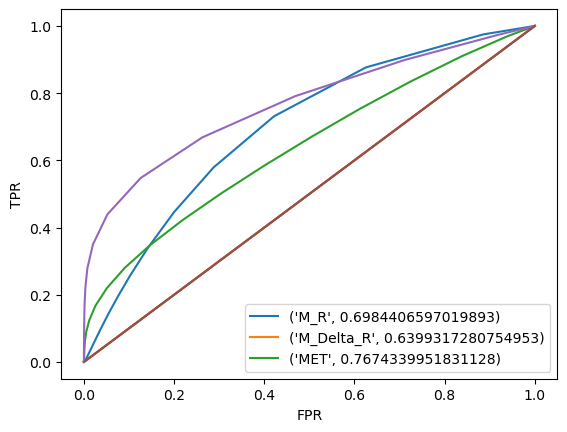

In [61]:
# 7.1

# from lec 17
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

# calculate AUC from lec. 17
def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

roc_legend = []
  
#ROC curve
for obs in selected_obs:

    #calculating TPR/FPR/AUC
    TPR,bins=compute_rate(df_sig[obs])
    FPR,bins=compute_rate(df_bkg[obs],bins=bins)
    AUC_calc = AUC(TPR,FPR) 
    
    roc_legend.append((obs,AUC_calc)) # for legend 

    #plotting curve
    plt.plot(FPR, TPR)
    plt.plot([0,1],[0,1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
plt.legend(roc_legend)
plt.show()

In [62]:
# 7.2 

# function to comapre roc curves of observables
def compare_roc(selection):

    for selected in selection:

        #calculating TPR/FPR/AUC
        TPR,bins=compute_rate(df_sig[selected])
        FPR,bins=compute_rate(df_bkg[selected],bins=bins)
        AUC_calc = AUC(TPR,FPR) 
    
        roc_legend.append((obs,AUC_calc)) # for legend 

        #plotting curve
        plt.plot(FPR, TPR)
        plt.plot([0,1],[0,1])
        plt.xlabel("FPR")
        plt.ylabel("TPR")
    
    plt.legend(roc_legend)
    plt.show()

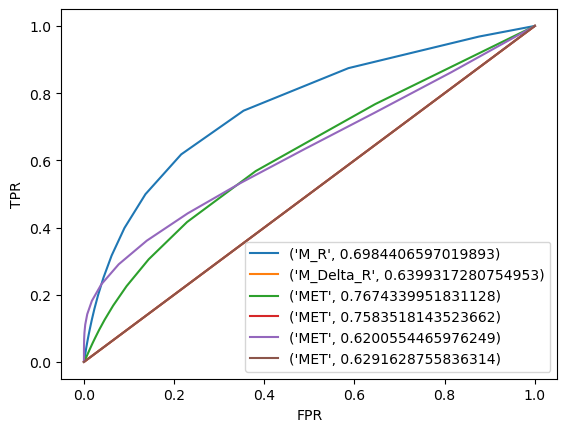

In [63]:
# 7.3 

# new slected features
selected_obs1 = ['l_1_pT', 'l_2_pT','MET_rel']

compare_roc(selected_obs1)

In [64]:
# 7.4 


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

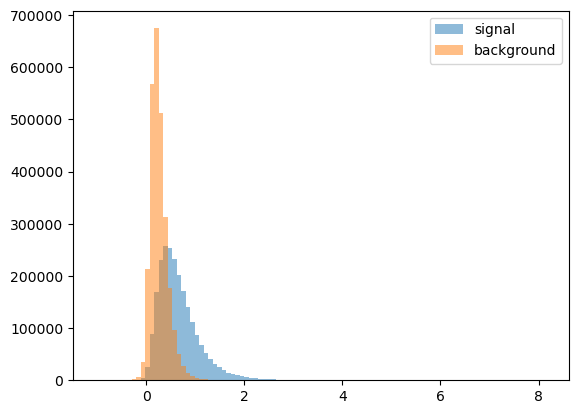

In [65]:
# 8.1 
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

#compute the mean of each feature
m_s= np.mean(df_sig_0,axis=0) #mean of each feature over signal pop
m_b= np.mean(df_bkg_0,axis=0) #mean of each feature over background pop

#computing between class SB covariance matrix
delta=np.matrix(m_s-m_b).transpose() #calculating delta and making sure its an 18x18 matrix
S_B= delta*delta.transpose() #calculating SB using delta

#computing within-class SW covariance matrix for signal
delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()

#within-class SW covariance matrix for background
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

#combine SW for signal and background to get SW
S_W=S_W_s+S_W_b

#computing w
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()

#renormalize
w_1 = w / sum(w)
w_1

# calculate feature mean
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

# m2-m1
delta = m_s-m_b
delta=np.matrix(m_s-m_b).transpose()

# m2-m1 transpose
S_B= delta*delta.transpose()

# signal
delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()

# bckgrd
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

# SW
S_W=S_W_s+S_W_b

# find w 
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()
w_1 = w / sum(w)

h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()